### 파이썬 머신러닝
## 비지도학습과 데이터 전처리
---
# 군집 (Clustering)

- 군집은 비지도 학습의 대표적인 방법이다.
- 많은 데이터가 주어졌을 때, 이들을 특징적인 몇몇 그룹으로 구분해 주는 기술이다.
- 사실 군집은 지도학습 보다 먼저 수행되는 것이라고 할 수 있다. 역사적으로 초기 공룡 연구자 들이라면 여러 공룡 화석을 수집한 다음 이를 적절히 군집 기술을 이용해 구분함으로서 공룡의 이름을 부여할 수 있었을 것이다. 이렇게 이름(타겟값)을 지정한 다음에 새로운 화석이 나타나면 회귀나 분류를 이용하여 이 화석을 구분할 수 있었을 것이다.

<img src="ch01_05.png"/>
<p style="text-align: center;">특징적인 그룹으로 구분해 주는 여러가지 군집 모델들 (출처: wikipedia)</p>

# k-means 군집화

- k-means 는 대표적인 군집 알고리즘이다.
- 우리가 분류하고 싶은 클래스의 갯수가 k 이다. 모든 샘플들을 공간상에 뿌리고 k개의 중심점 위치를 랜덤하게 잡는다.
- k개의 중심점을 기준으로 공간을 나눈 다음, 나누어진 각 공간에 속한 점들의 평균 위치로 중심점을 이동시킨다.
- 이런 과정을 반복하여 k개의 최종 중심점 위치를 찾아낸다.
- 점들 간의 거리와 거리들의 평균을 계산하기 때문에 **정규화** 가 필요하다.

<img src="ch03_01.jpg"/>
<p style="text-align: center;">출처: https://en.wikipedia.org/wiki/K-means_clustering</p>

- Iris 데이터에서 목표값이 없다고 가정하고 아래에서 k-means 군집 알고리즘을 적용해 보겠다.

In [1]:
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

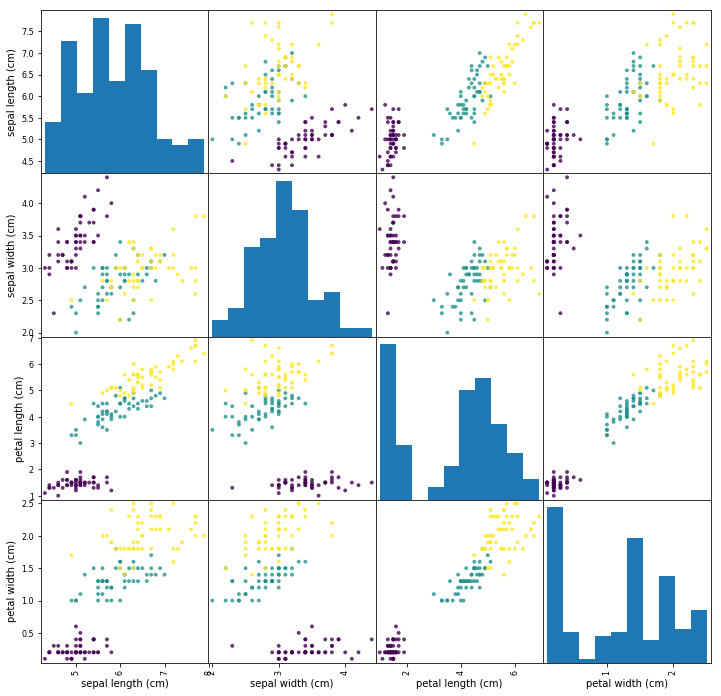

In [2]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])
print('')

- 위의 산점도에서 sepal length 와 petal width 를 살펴보자.

In [2]:
col1 = 0
col2 = 3

X = iris.data[:,[col1,col2]]
y = iris.target # y 값은 군집에서 사용하지 않는다

from sklearn.cluster import KMeans

model = KMeans(3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [3]:
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2])

In [31]:
# labels = np.where(model.labels_==1, 0, np.where(model.labels_==0, 1, model.labels_))
# labels = model.labels_.copy()
# labels[labels==1]=999
# labels[labels==0]=1
# labels[labels==999]=0

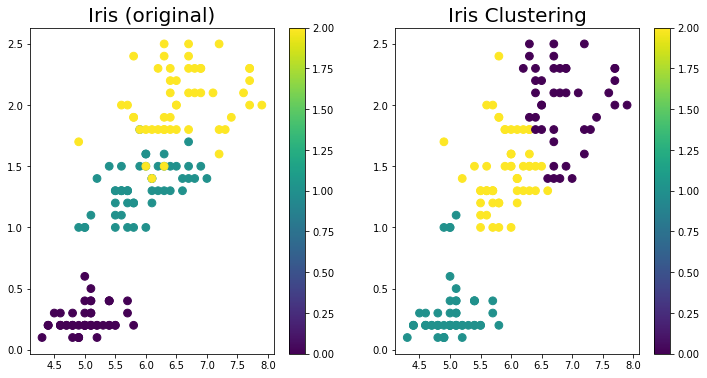

In [4]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('Iris (original)', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Iris Clustering', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=labels, s=60)
plt.colorbar()

- 맞지 않는 샘플 갯수를 계산해 보자

In [7]:
label2 = np.where(labels==0, 2, np.where(labels==1, 0, 1))
(label2!=iris.target).sum()

26

In [8]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2])

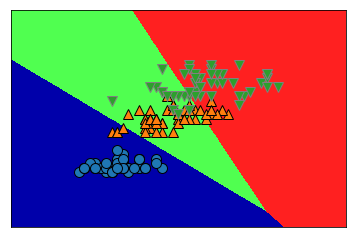

In [5]:
import mglearn

mglearn.plots.plot_2d_classification(model, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

- 위 그림과 model.labels_ 값을 보면, 기존 타겟값과 유사하게 0,1,2 로 값이 지정되었음을 볼 수 있다.
- 아래에서 기존 클래스와 군집 결과를 비교해 보겠다.

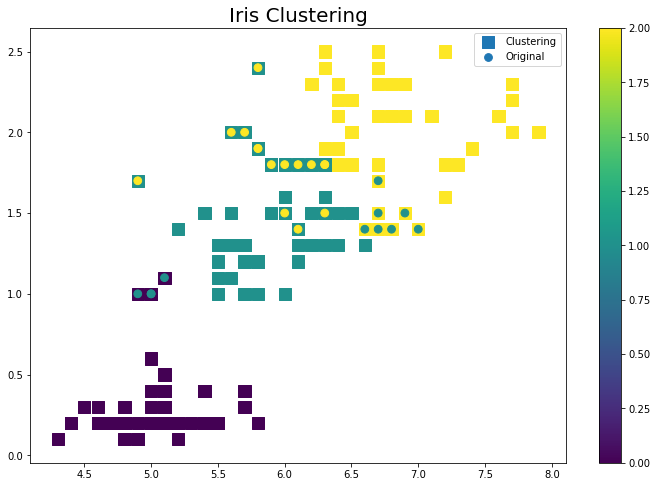

In [10]:
plt.figure(figsize=[12,8])
plt.title('Iris Clustering', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=label2, marker='s', s=150)
CS = plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.legend(['Clustering', 'Original'])
plt.colorbar(CS)

In [11]:
model.cluster_centers_

array([[6.85714286, 2.01190476],
       [5.00555556, 0.30185185],
       [5.89259259, 1.46296296]])

### 샘플 데이터에 적용

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs()

In [13]:
X.shape, y.shape

((100, 2), (100,))

In [15]:
y

array([0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1])

In [14]:
np.bincount(y)

array([34, 33, 33], dtype=int64)

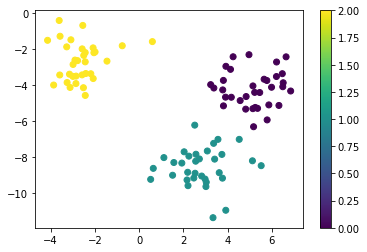

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [15]:
model = KMeans(3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

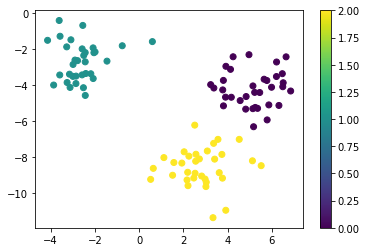

In [16]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.colorbar()

In [19]:
model.cluster_centers_

array([[-9.08023603,  6.36812541],
       [ 2.62416785,  2.14926174],
       [-0.377075  , -5.02462408]])

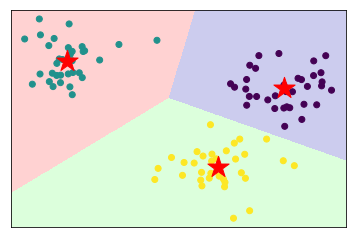

In [25]:
import mglearn

mglearn.plots.plot_2d_classification(model, X, eps=0.5, alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
            marker='*', c='r', s=500)

In [26]:
model.predict([[0, 0]])

array([1])

In [27]:
model.transform([[0,0]])

array([[6.64556636, 3.75563598, 8.99758236]])

In [29]:
model.transform(X)

array([[ 7.7326922 ,  0.1831611 ,  7.85388711],
       [ 8.03776046,  0.71799532,  8.49275135],
       [ 1.13694074,  8.81353465,  4.62393512],
       [ 6.82940045,  7.25144749,  2.37457715],
       [ 1.34924528,  9.21597395,  5.80125392],
       [ 6.0164746 ,  7.539751  ,  1.36030111],
       [ 4.72628248,  7.15640143,  0.82495144],
       [ 7.37695471, 10.51548965,  2.85510039],
       [ 5.59454715,  8.76081751,  0.86432576],
       [ 1.32332231,  6.81488436,  4.04809328],
       [ 1.08416486,  7.06613485,  4.12270471],
       [ 4.27778441,  9.97682138,  2.71981406],
       [ 8.24671206,  0.39544453,  8.1278006 ],
       [ 7.59040191,  1.88121317,  6.57902132],
       [ 1.48493705,  9.2609499 ,  4.91707505],
       [ 8.74027522,  1.05476991,  9.03315648],
       [ 5.14459089,  9.08902502,  1.1426688 ],
       [ 3.99105844,  9.49749755,  2.35028203],
       [ 7.37911989,  0.79710511,  7.19623102],
       [ 1.09325003,  8.1858116 ,  4.01044681],
       [ 8.33590557,  0.86928489,  7.878

In [28]:
help(model)

Help on KMeans in module sklearn.cluster.k_means_ object:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time 

### KMeans 의 한계
- 만일 아이리스 데이터를 2개의 군집으로 분류하면 어떻게 될까?

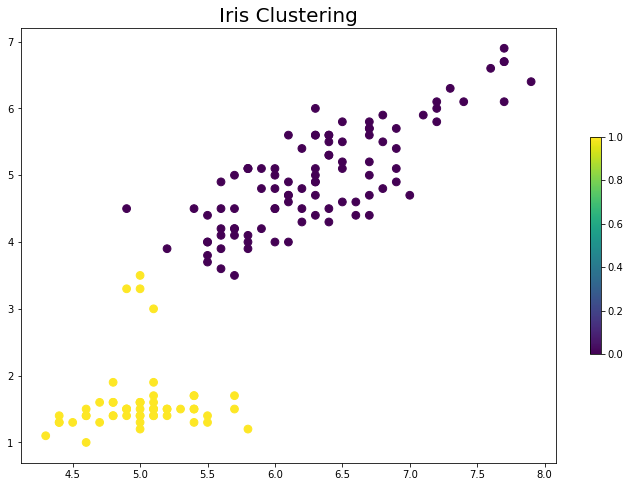

In [32]:
X = iris.data[:,[0,2]]

model = KMeans(2)
model.fit(X)

plt.figure(figsize=[12,8])
plt.title('Iris Clustering', fontsize=20)
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=60)
plt.colorbar(shrink=0.5)

- 위의 결과는 의도하지 않은 것이다. Setosa 와 나머지 것들을 구불할 거라고 예측하지만 그렇지 않다.
- 원인은, 갯수가 균등하지 않고 사이 간격이 충분히 넓지 않았기 때문이다.

In [23]:
model.cluster_centers_ # 중심점 위치들

array([[5.078125  , 0.44375   ],
       [6.4127907 , 1.76046512]])

In [24]:
model.predict([[6, 1]]) # 결과를 해석하려면 위의 colorbar 를 확인해야 한다.

array([1])

In [25]:
model.transform([[6, 1]]) # 각 중심점 까지의 거리 벡터

array([[1.07669289, 0.86527646]])

### k-means 를 사용한 속성 변경
- 위의 transform() 함수를 이용하여 새로운 속성을 만들 수 있습니다.
- 만일 10개의 군집으로 나눈다면 속성이 10개로 늘어나게 됩니다.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target)

kmeans10 = KMeans(10)
X_train_10 = kmeans10.fit_transform(X_train)
X_test_10 = kmeans10.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_10, y_train)

train_score = lr.score(X_train_10, y_train)
test_score = lr.score(X_test_10, y_test)

train_score, test_score

(0.9642857142857143, 0.9473684210526315)

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train,X_test,y_train,y_test = train_test_split(X, y)

ss = StandardScaler()
ss.fit(X_train)
X_train_norm = ss.transform(X_train)
X_test_norm = ss.transform(X_test)

kmeans10 = KMeans(10)
X_train_10 = kmeans10.fit_transform(X_train_norm)
X_test_10 = kmeans10.transform(X_test_norm)

lr = LogisticRegression()
lr.fit(X_train_10, y_train)

train_score = lr.score(X_train_10, y_train)
test_score = lr.score(X_test_10, y_test)

train_score, test_score

(0.9694835680751174, 0.9790209790209791)

In [43]:
lr.coef_

array([[ 8.88212700e-02,  1.31995339e-03,  4.17639429e-01,
         4.81319142e-01,  1.09292853e+00, -1.78340552e+00,
        -1.10747482e+00,  3.24163856e-01, -4.78326248e-01,
         7.70744235e-01]])

In [42]:
X_train_10

array([[ 7.46759017,  9.61644974, 14.68307092, ...,  9.17549411,
         7.03176859, 11.51002584],
       [10.34026001,  6.16689611,  6.92447386, ...,  8.9774947 ,
         7.81033376,  6.21056831],
       [ 7.61676863,  2.38812843,  7.89514477, ...,  5.78207409,
         5.03020911,  8.61361229],
       ...,
       [ 9.17540468,  5.59222144,  6.21801604, ...,  8.10324142,
         6.99997436,  5.70674822],
       [ 3.304014  ,  4.63118528, 12.65930768, ...,  2.15639144,
         3.54715926, 12.71384475],
       [ 3.53823473,  4.8773123 , 13.39234367, ...,  3.43280901,
         3.59069145, 13.4695054 ]])

### 다양한 데이터 분포에서 k-means 적용
- 몇가지 특이한 형태의 데이터 분포를 살펴 보겠습니다.

(100, 2) [0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1]


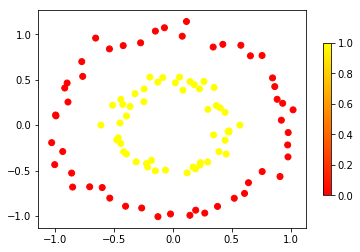

In [32]:
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_circles(factor=0.5, noise=0.05) # factor = R1/R2, noise: svd
print(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

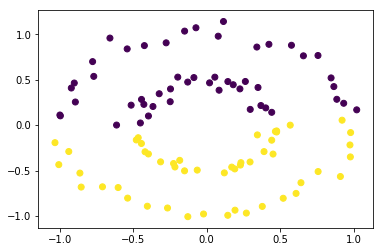

In [33]:
model = KMeans(2)
model.fit(X)

plt.scatter(X[:,0], X[:,1], c=model.labels_)

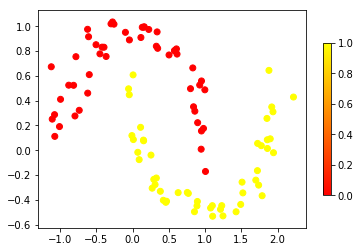

In [34]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.1)
#display(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

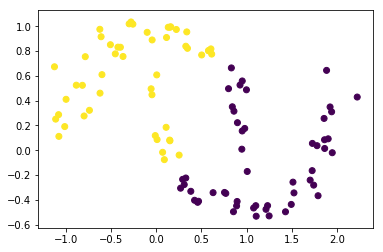

In [35]:
model = KMeans(2)
model.fit(X)

plt.scatter(X[:,0], X[:,1], c=model.labels_)

- 위와 같은 데이터가 있다고 했을 때, k-means 는 잘 작동하지 않습니다. 왜냐하면 k-means 도 선형적으로 데이터를 구분하기 때문입니다.
- 이런 경우는 데이터의 특성을 시각적으로 확인한 다음, 데이터에 맞는 변환을 먼저 수행한 후에 k-means 를 적용하여야 합니다.
> 첫번째 그림은 각도와 중심거리로, 두번째 그림은 중간에 가상의 sine 곡선을 그리고 그 곡선과의 거리로 변환하면 좋을 것입니다.